In [104]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('data_property_tax_report_2018.csv')
original = df.copy()

In [5]:
df.shape

(205346, 28)

In [6]:
df.columns

Index(['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],
      dtype='object')

In [7]:
df.dtypes

PID                            object
LEGAL_TYPE                     object
FOLIO                         float64
LAND_COORDINATE                 int64
ZONE_NAME                      object
ZONE_CATEGORY                  object
LOT                            object
BLOCK                          object
PLAN                           object
DISTRICT_LOT                   object
FROM_CIVIC_NUMBER              object
TO_CIVIC_NUMBER               float64
STREET_NAME                    object
PROPERTY_POSTAL_CODE           object
NARRATIVE_LEGAL_LINE1          object
NARRATIVE_LEGAL_LINE2          object
NARRATIVE_LEGAL_LINE3          object
NARRATIVE_LEGAL_LINE4          object
NARRATIVE_LEGAL_LINE5          object
CURRENT_LAND_VALUE              int64
CURRENT_IMPROVEMENT_VALUE       int64
TAX_ASSESSMENT_YEAR             int64
PREVIOUS_LAND_VALUE           float64
PREVIOUS_IMPROVEMENT_VALUE    float64
YEAR_BUILT                    float64
BIG_IMPROVEMENT_YEAR          float64
TAX_LEVY    

In [8]:
df.describe()

,FOLIO,LAND_COORDINATE,TO_CIVIC_NUMBER,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
count,2.053460e+05,2.053460e+05,204731.000000,2.053460e+05,2.053460e+05,205346.0,2.030420e+05,2.030420e+05,194899.000000,194905.000000,0.0,205346.000000
mean,4.984322e+11,4.984322e+07,2355.494566,1.862369e+06,4.006923e+05,2018.0,1.695359e+06,3.875009e+05,1979.969641,1987.354090,NaN,16.524159
std,2.479372e+11,2.479372e+07,1947.760697,1.074259e+07,4.148662e+06,0.0,9.646130e+06,4.236152e+06,29.419729,19.839132,NaN,9.052394
min,1.963206e+10,1.963206e+06,1.000000,0.000000e+00,0.000000e+00,2018.0,0.000000e+00,0.000000e+00,1800.000000,200.000000,NaN,1.000000
25%,2.107920e+11,2.107919e+07,948.000000,4.680000e+05,9.530000e+04,2018.0,3.840000e+05,9.470000e+04,1965.000000,1975.000000,NaN,9.000000
50%,6.122360e+11,6.122363e+07,1777.000000,1.057000e+06,1.830000e+05,2018.0,9.440000e+05,1.810000e+05,1990.000000,1992.000000,NaN,16.000000
75%,6.882770e+11,6.882774e+07,3290.000000,1.692000e+06,2.950000e+05,2018.0,1.680000e+06,2.880000e+05,2002.000000,2002.000000,NaN,25.000000
max,8.453130e+11,8.453134e+07,9295.000000,3.516727e+09,6.117980e+08,2018.0,3.319471e+09,6.262320e+08,2015.000000,2015.000000,NaN,30.000000


In [9]:
df.PROPERTY_POSTAL_CODE.isnull()

0         False
1         False
2         False
3         False
4         False
          ...  
205341     True
205342     True
205343    False
205344    False
205345    False
Name: PROPERTY_POSTAL_CODE, Length: 205346, dtype: bool

In [10]:
df.PROPERTY_POSTAL_CODE.isnull().sum()

3801

In [11]:
df.PROPERTY_POSTAL_CODE.isnull().sum() / len(df)

0.018510221772033545

In [16]:
df[ df.PROPERTY_POSTAL_CODE.isnull() ]\
[['PROPERTY_POSTAL_CODE','STREET_NAME']]

,PROPERTY_POSTAL_CODE,STREET_NAME
29,NaN,VACANT
30,NaN,39TH AVE E
777,NaN,NaN
1086,NaN,FRASER ST
1414,NaN,SKEENA ST
...,...,...
205327,NaN,PIERVIEW CRES
205333,NaN,KING EDWARD AVE E
205336,NaN,FIR ST
205341,NaN,QUEBEC ST


In [17]:
df.PROPERTY_POSTAL_CODE.notnull()

0          True
1          True
2          True
3          True
4          True
          ...  
205341    False
205342    False
205343     True
205344     True
205345     True
Name: PROPERTY_POSTAL_CODE, Length: 205346, dtype: bool

In [18]:
# data cleaning
df = df[ df.PROPERTY_POSTAL_CODE.notnull() ]

In [19]:
df.head()

,PID,LEGAL_TYPE,FOLIO,LAND_COORDINATE,ZONE_NAME,ZONE_CATEGORY,LOT,BLOCK,PLAN,DISTRICT_LOT,...,NARRATIVE_LEGAL_LINE5,CURRENT_LAND_VALUE,CURRENT_IMPROVEMENT_VALUE,TAX_ASSESSMENT_YEAR,PREVIOUS_LAND_VALUE,PREVIOUS_IMPROVEMENT_VALUE,YEAR_BUILT,BIG_IMPROVEMENT_YEAR,TAX_LEVY,NEIGHBOURHOOD_CODE
0,025-734-601,STRATA,7.500400e+11,75004024,C-2,Commercial,25,NaN,BCS498,2027,...,NaN,592000,242000,2018,472000.0,238000.0,2003.0,2003.0,NaN,3
1,029-700-868,STRATA,6.381830e+11,63818250,CD-1 (464),Comprehensive Development,132,NaN,EPS2983,200A,...,T OF THE STRATA LOT AS SHOWN ON FOR,715000,327000,2018,603000.0,329000.0,NaN,NaN,NaN,13
2,029-814-227,STRATA,1.708260e+11,17082596,CD-1 (535),Comprehensive Development,25,NaN,EPS3173,311,...,TITLEMENT OF THE STRATA LOT AS SHOW,507000,273000,2018,416000.0,273000.0,NaN,NaN,NaN,12
3,029-918-731,STRATA,6.401940e+11,64019406,IC-3,Light Industrial,40,26,EPS2425,200A,...,NTITLEMENT OF THE STRATA LOT AS SHO,227000,170000,2018,168000.0,170000.0,NaN,NaN,NaN,13
4,017-393-400,STRATA,6.011150e+11,60111496,CD-1 (233),Comprehensive Development,7,NaN,LMS75,185,...,NaN,801000,380000,2018,531000.0,385000.0,1991.0,1991.0,NaN,27


In [20]:
df.PROPERTY_POSTAL_CODE.head()

0    V6N 3E6
1    V5Y 0K3
2    V5X 0E2
3    V5T 0E8
4    V6G 3C9
Name: PROPERTY_POSTAL_CODE, dtype: object

In [21]:
df.PROPERTY_POSTAL_CODE.tail()

205339    V5L 3J7
205340    V5T 0A1
205343    V6Z 2A3
205344    V5T 4S2
205345    V5W 1Y1
Name: PROPERTY_POSTAL_CODE, dtype: object

In [22]:
df.PROPERTY_POSTAL_CODE.isnull().sum()

0

In [23]:
df.shape

(201545, 28)

In [27]:
df.YEAR_BUILT.describe()

count    193975.000000
mean       1979.965269
std          29.444047
min        1800.000000
25%        1965.000000
50%        1990.000000
75%        2002.000000
max        2015.000000
Name: YEAR_BUILT, dtype: float64

In [29]:
df.YEAR_BUILT.isnull().sum()

7570

In [30]:
df = df[ df.YEAR_BUILT.notnull() ]

In [31]:
df.shape

(193975, 28)

In [32]:
df.columns

Index(['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],
      dtype='object')

In [34]:
df.PID.head()

0    025-734-601
4    017-393-400
5    028-445-864
6    003-034-496
7    016-160-070
Name: PID, dtype: object

In [40]:
df = df[['PID', 'YEAR_BUILT']].groupby('YEAR_BUILT', as_index=False).count()

In [42]:
#df.columns = ['PID', 'NO_OF_PROPS']

Index(['YEAR_BUILT', 'PID'], dtype='object')

In [53]:
df = df.rename(columns={'PID':'NO_OF_PROPS'})

In [54]:
filter_but_actually_the_whole_dataset_robin = df[(df['YEAR_BUILT'] > 1900) & (df['YEAR_BUILT'] <= 2000)]
df = filter_but_actually_the_whole_dataset_robin

In [55]:
df.YEAR_BUILT.describe()

count     100.000000
mean     1950.500000
std        29.011492
min      1901.000000
25%      1925.750000
50%      1950.500000
75%      1975.250000
max      2000.000000
Name: YEAR_BUILT, dtype: float64

In [ ]:
# or like this:
filter_robin = (df['YEAR_BUILT'] > 1900) & (df['YEAR_BUILT'] <= 2000)
df[filter_robin]

In [52]:
df

,YEAR_BUILT,PID
7,1901.0,303
8,1902.0,15
9,1903.0,23
10,1904.0,67
11,1905.0,469
...,...,...
102,1996.0,4107
103,1997.0,4788
104,1998.0,4790
105,1999.0,4867


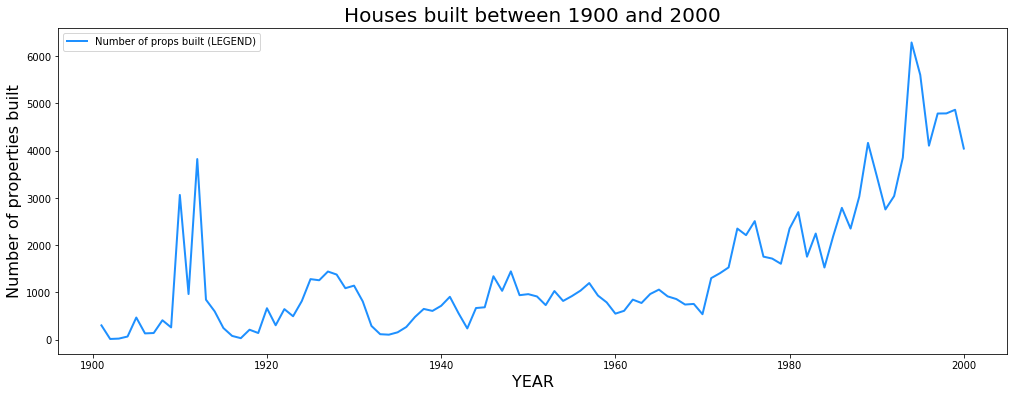

<Figure size 432x288 with 0 Axes>

In [76]:
plt.figure(figsize=(17,6))
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
plt.plot(x, y, 'dodgerblue', 
         label='Number of props built (LEGEND)',
        linewidth=2)
plt.title('Houses built between 1900 and 2000', fontsize=20)
plt.xlabel('YEAR', fontsize=16)
plt.ylabel('Number of properties built', fontsize=16)
plt.legend()
plt.savefig('line_plot_props_built_4.png', dpi = 400, quality=100)
plt.show()
plt.clf()

In [68]:
# doesntwork:
'''
plt.plot(x, y, 'dodgerblue', 
         label='Number of props built',
        linewidth=2, xlabel='test Kevin')
'''

"\nplt.plot(x, y, 'dodgerblue', \n         label='Number of props built',\n        linewidth=2, xlabel='test Kevin')\n"

In [59]:
17 * 2.54

43.18

In [60]:
6*2.54

15.24

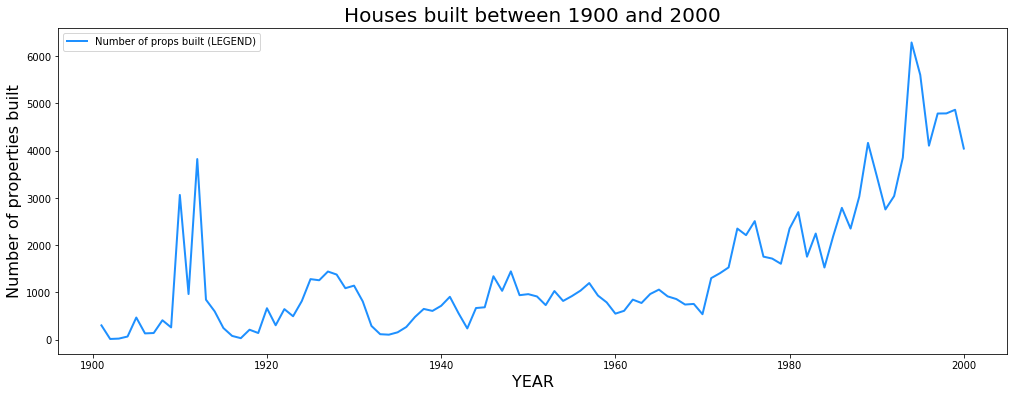

<Figure size 432x288 with 0 Axes>

In [77]:
plt.figure(figsize=(17,6))
x = df.YEAR_BUILT
y = df.NO_OF_PROPS
plt.plot(x, y, 'dodgerblue', 
         label='Number of props built (LEGEND)',
        linewidth=2)
plt.title('Houses built between 1900 and 2000', fontsize=20)
plt.xlabel('YEAR', fontsize=16)
plt.ylabel('Number of properties built', fontsize=16)
plt.legend()
plt.savefig('line_plot_props_built_5_SVG.svg', dpi = 400, quality=100)
plt.show()
plt.clf()

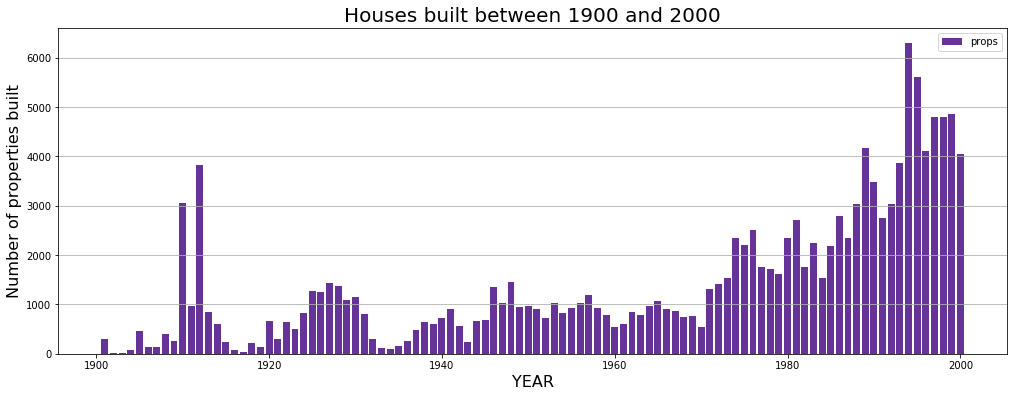

<Figure size 432x288 with 0 Axes>

In [84]:
plt.figure(figsize=(17,6))
plt.bar(x,y, label='props', color = 'rebeccapurple')
plt.title('Houses built between 1900 and 2000', fontsize=20)
plt.xlabel('YEAR', fontsize=16)
plt.ylabel('Number of properties built', fontsize=16)
plt.legend()
#plt.grid(True)
plt.grid(axis='y')
plt.savefig('bar_plot_props_built.png', dpi = 400, quality=100)
plt.show()
plt.clf()



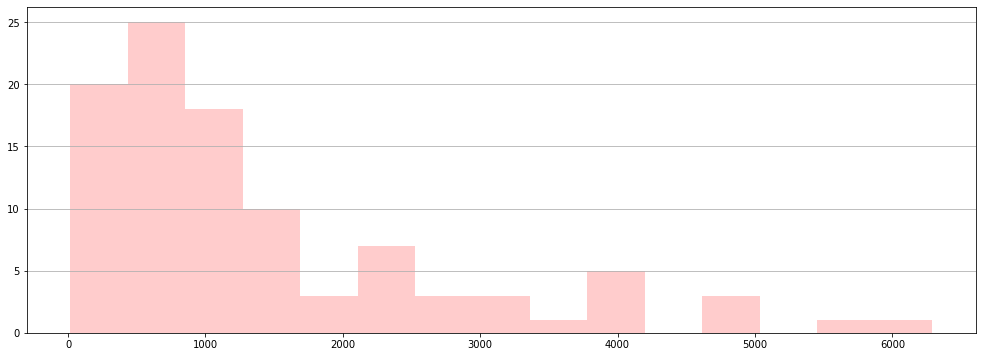

In [102]:
plt.figure(figsize=(17,6))
plt.hist(df.NO_OF_PROPS,
        bins=15,
        histtype='bar',
        color='red',
        alpha = 0.2)
plt.grid(axis='y')

In [88]:
df.NO_OF_PROPS.describe()

count     100.000000
mean     1414.960000
std      1353.257618
min        15.000000
25%       556.250000
50%       928.000000
75%      1757.250000
max      6292.000000
Name: NO_OF_PROPS, dtype: float64

In [103]:
df.columns

Index(['YEAR_BUILT', 'NO_OF_PROPS'], dtype='object')

In [118]:
# back to our backup
df = original.copy()

In [119]:
df.columns

Index(['PID', 'LEGAL_TYPE', 'FOLIO', 'LAND_COORDINATE', 'ZONE_NAME',
       'ZONE_CATEGORY', 'LOT', 'BLOCK', 'PLAN', 'DISTRICT_LOT',
       'FROM_CIVIC_NUMBER', 'TO_CIVIC_NUMBER', 'STREET_NAME',
       'PROPERTY_POSTAL_CODE', 'NARRATIVE_LEGAL_LINE1',
       'NARRATIVE_LEGAL_LINE2', 'NARRATIVE_LEGAL_LINE3',
       'NARRATIVE_LEGAL_LINE4', 'NARRATIVE_LEGAL_LINE5', 'CURRENT_LAND_VALUE',
       'CURRENT_IMPROVEMENT_VALUE', 'TAX_ASSESSMENT_YEAR',
       'PREVIOUS_LAND_VALUE', 'PREVIOUS_IMPROVEMENT_VALUE', 'YEAR_BUILT',
       'BIG_IMPROVEMENT_YEAR', 'TAX_LEVY', 'NEIGHBOURHOOD_CODE'],
      dtype='object')

In [120]:
df.ZONE_CATEGORY.unique()

array(['Commercial', 'Comprehensive Development', 'Light Industrial',
       'Multiple Family Dwelling', 'One Family Dwelling',
       'Two Family Dwelling', 'Limited Agricultural', nan, 'Industrial',
       'Historic Area'], dtype=object)

In [121]:
for e in df.ZONE_CATEGORY.unique():
    print(e)

Commercial
Comprehensive Development
Light Industrial
Multiple Family Dwelling
One Family Dwelling
Two Family Dwelling
Limited Agricultural
nan
Industrial
Historic Area


In [122]:
df = df[ df.ZONE_CATEGORY.notnull() ]

In [123]:
original.shape

(205346, 28)

In [124]:
df.shape

(203502, 28)

In [125]:
df = df.groupby('ZONE_CATEGORY', as_index=False)['PID'].count()

In [126]:
df = df.rename(columns={'PID':'NO_OF_PROPS'})

In [127]:
df

,ZONE_CATEGORY,NO_OF_PROPS
0,Commercial,17869
1,Comprehensive Development,67550
2,Historic Area,2457
3,Industrial,1239
4,Light Industrial,3297
5,Limited Agricultural,163
6,Multiple Family Dwelling,27305
7,One Family Dwelling,68344
8,Two Family Dwelling,14750


In [128]:
df['PERC_OF_PROP'] = df.NO_OF_PROPS / df.NO_OF_PROPS.sum()

In [129]:
df

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
0,Commercial,17869,0.088036
1,Comprehensive Development,67550,0.332801
2,Historic Area,2457,0.012105
3,Industrial,1239,0.006104
4,Light Industrial,3297,0.016243
5,Limited Agricultural,163,0.000803
6,Multiple Family Dwelling,27305,0.134525
7,One Family Dwelling,68344,0.336713
8,Two Family Dwelling,14750,0.072669


In [131]:
df['PERC_OF_PROP'] = df['PERC_OF_PROP'] * 100

In [133]:
# same
df['PERC_OF_PROP'].multiply(100)

0     880.359061
1    3328.012455
2     121.049987
3      61.042301
4     162.434598
5       8.030585
6    1345.246189
7    3367.130766
8     726.694059
Name: PERC_OF_PROP, dtype: float64

In [134]:
df

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
0,Commercial,17869,8.803591
1,Comprehensive Development,67550,33.280125
2,Historic Area,2457,1.210500
3,Industrial,1239,0.610423
4,Light Industrial,3297,1.624346
5,Limited Agricultural,163,0.080306
6,Multiple Family Dwelling,27305,13.452462
7,One Family Dwelling,68344,33.671308
8,Two Family Dwelling,14750,7.266941


In [137]:
df_top5 = df.nlargest(columns='PERC_OF_PROP', n=5)
df_top5

,ZONE_CATEGORY,NO_OF_PROPS,PERC_OF_PROP
7,One Family Dwelling,68344,33.671308
1,Comprehensive Development,67550,33.280125
6,Multiple Family Dwelling,27305,13.452462
0,Commercial,17869,8.803591
8,Two Family Dwelling,14750,7.266941


In [139]:
percentages = df_top5.PERC_OF_PROP
percentages

7    33.671308
1    33.280125
6    13.452462
0     8.803591
8     7.266941
Name: PERC_OF_PROP, dtype: float64

In [140]:
cats        = df_top5.ZONE_CATEGORY
cats


7          One Family Dwelling
1    Comprehensive Development
6     Multiple Family Dwelling
0                   Commercial
8          Two Family Dwelling
Name: ZONE_CATEGORY, dtype: object

In [145]:
cols = ['rebeccapurple', 'k', 'olive', 'm', 'y']
#cols = ['purple', 'red', 'green', 'orange', 'dodgerblue']
cols = ['rebeccapurple', 'k', 'olive', 'm', 'y']

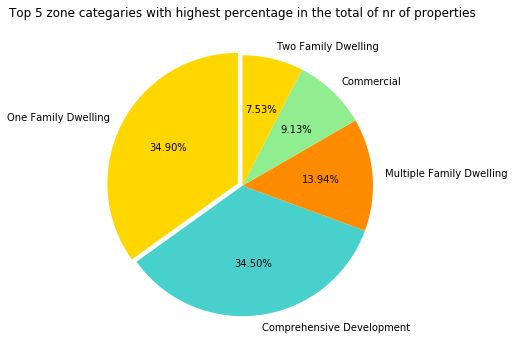

<Figure size 432x288 with 0 Axes>

In [174]:
cols = ['gold', 'mediumturquoise', 'darkorange', 'lightgreen']

plt.figure(figsize=(17,6))
#color.palette = viridis
#plt.viridis()
plt.pie(percentages,
       labels=cats,
       startangle=90,
        colors=cols,
       explode=(0.04,0,0,0,0),
       autopct = '%1.2f%%')
plt.title('Top 5 zone categaries with highest percentage in the total of nr of properties')
plt.show()
plt.clf()

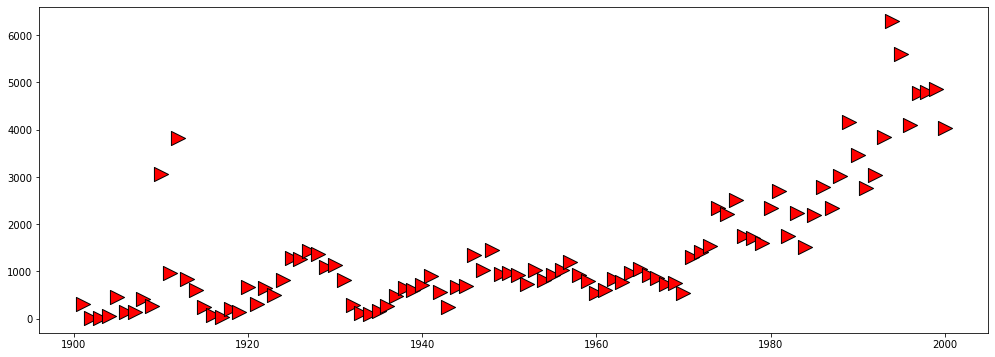

In [180]:
plt.figure(figsize=(17,6))
plt.scatter(x,y, label='No of props built', s = 200,
            color='red',edgecolor='black', marker='>')

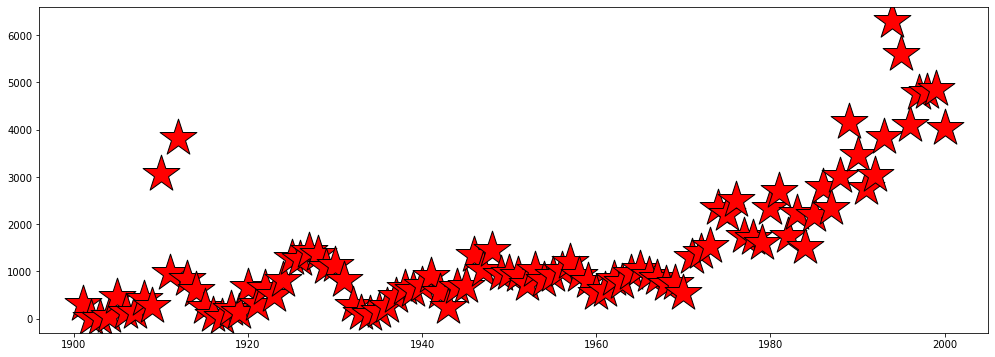

In [182]:
plt.figure(figsize=(17,6))
plt.scatter(x,y, label='No of props built', s = 1500,
            color='red',edgecolor='black', marker='*')

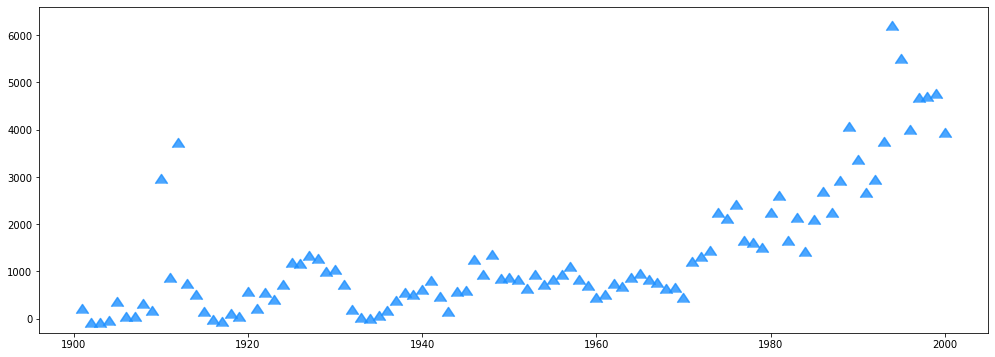

In [188]:
plt.figure(figsize=(17,6))
plt.scatter(x,y, label='No of props built', s = 150,
            color='dodgerblue',edgecolor='black', 
            alpha=0.8,
            marker=6)